# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [6]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print(male_df.Height.mean())
print(male_df.Height.std())
print(male_df.Weight.mean())
print(male_df.Weight.std())

print(female_df.Height.mean())
print(female_df.Height.std())
print(female_df.Weight.mean())
print(female_df.Weight.std())



# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

69.02634590621737
2.8633622286606517
187.0206206581929
19.781154516763813
63.708773603424916
2.696284015765056
135.8600930074687
19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

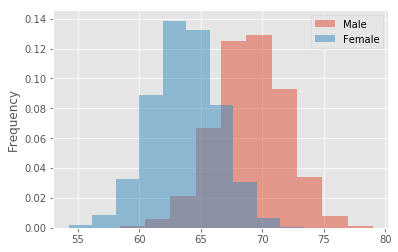

In [9]:
# Your code here
bins = 10
male_df.Height.plot.hist(bins=bins, alpha=0.5, density=True, label='Male')
female_df.Height.plot.hist(bins=bins, alpha=0.5, density=True, label='Female')
plt.legend()
plt.show()


In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

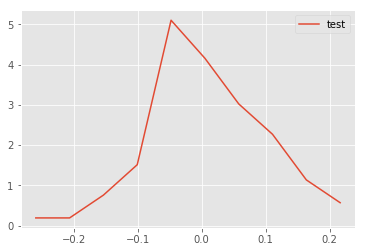

In [28]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1) # This finds the binned x values - as divided into 10 bins 
    # n is the value of each bin and bins are the binned values of x
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for val in range(n.size):
#         print(val)
        pdfx[val] = (bins[val]+bins[val+1])/2
        pdfy[val] = n[val]
    return pdfx, pdfy 


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

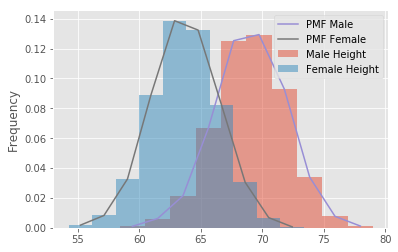

In [40]:
# Your code here 
male_df.Height.plot.hist(bins = bins, density = True,  alpha = 0.5, label ="Male Height");
female_df.Height.plot.hist(bins = bins, density = True, alpha = 0.5, label = 'Female Height');


x,y = density(male_df.Height)
plt.plot(x,y, label='PMF Male')


x,y = density(female_df.Height)
plt.plot(x,y, label='PMF Female')

plt.legend()


plt.show()


## Repeat the above exercise for male and female weights

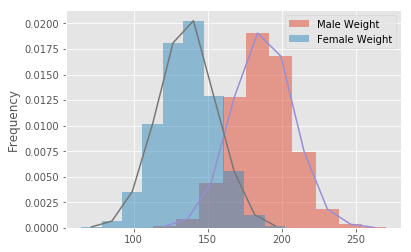

In [45]:
# Your code here 
# Your code here 
male_df.Weight.plot.hist(bins = bins, density = True,  alpha = 0.5, label ="Male Weight");
female_df.Weight.plot.hist(bins = bins, density = True, alpha = 0.5, label = 'Female Weight');


plt.legend()


x,y = density(male_df.Weight)
plt.plot(x,y, label='PMF Male')


x,y = density(female_df.Weight)
plt.plot(x,y, label='PMF Female')

# plt.legend()


plt.show()



## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

# Female and male weights seem to correlate with heights, with heights having a broader distribution. 

## Repeat the above experiments in seaborn and compare with your results

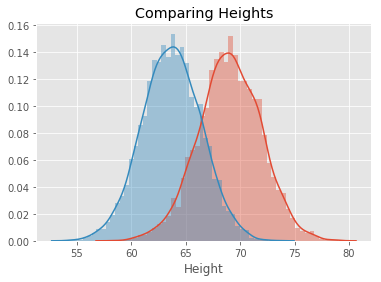

In [46]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

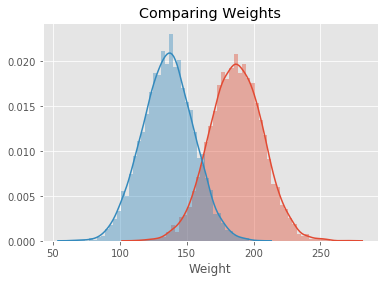

In [47]:
# Code for weights here
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?


## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.